# Основы NumPy
Большинство аналитиков данных для работы с массивами пользуется библиотекой с *открытым исходным кодом* **NumPy**.
Для массивов в ней реализован тип `ndarray`, а также операции и математические функций по работе с массивами.

Устанавливать NumPy не требуется, если вы пользуетесь Google Colab. Для Jupyter или Python на локальном компьютере библиотеку требуется установить, подробности по установке [тут](https://numpy.org/install/)

Подключают NumPy чаще всего под псевдонимом `np`:

In [ ]:
import numpy as np

## Массивы `np.array`
Массивы в отличие от списков имеют **фиксированный тип данных** и **фиксированную длину**.
Менять значения в массиве можно в пределах допустимых значений типа элементов.

Создавать массивы нужно НЕ через конструктор `ndarray`, а другими способами.

In [ ]:
A = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(type(A), A)

<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]


Можно создать массив нужного размера, заполненный нулями или единицами:

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Функция `np.arange` генерирует массив со значениями в указаном диапазоне чисел. Как и у стандартной функции `range`, если указано одно число, то левая граница прогрессии — ноль:

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Укажем правую границу. Как и у обычного `range`, она не входит в диапазон:

In [ ]:
np.arange(5, 15)

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Третий параметр `arange` — *шаг* прогрессии. Не всегда при этом легко сказать сколько чисел получится в этом массиве.

In [ ]:
np.arange(10, 100, 15)

array([10, 25, 40, 55, 70, 85])

`arange` работает как с целыми границами и шагом, так и *с дробными*. Это существенное отличие от `range`:

In [ ]:
np.arange(0.2, 10.9, 0.5)

array([ 0.2,  0.7,  1.2,  1.7,  2.2,  2.7,  3.2,  3.7,  4.2,  4.7,  5.2,
        5.7,  6.2,  6.7,  7.2,  7.7,  8.2,  8.7,  9.2,  9.7, 10.2, 10.7])

Обратите внимание, что в отличие от генератора арифметических прогрессий `range`, функция `np.arange` реально создаёт массив с числами в памяти! Значения в массиве *можно менять*.

In [ ]:
A = np.arange(10)
A[0] = 1000
A[-1] = 999
A

array([1000,    1,    2,    3,    4,    5,    6,    7,    8,  999])

Если хотим указать *количество элементов*, а шаг пусть вычисляется автоматически, можно воспользоваться `linspace`:

In [ ]:
np.linspace(0, 10, 9)

array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ])

*Правая граница при этом входит в набор чисел*.

Такой способ генерации массива очень удобен для последующего рисования графиков функций в указанном промежутке с заданным количеством точек.

### Векторные операции с массивами
Одна из самых крутых возможностей NumPy — это *массовые операции с массивами*, которые ещё и быстро работают.

Давайте посмотрим на отличие поведения `list` и `np.ndarray` при умножении на число:

In [ ]:
A = [1, 2, 3, 4, 5]
B = A * 5
print(B)

A = np.arange(1, 6)
B = A * 5
print(B)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[ 5 10 15 20 25]


In [ ]:
np.sin(B)

array([-0.95892427, -0.54402111,  0.65028784,  0.91294525, -0.13235175])

In [ ]:
np.exp(B)

array([1.48413159e+02, 2.20264658e+04, 3.26901737e+06, 4.85165195e+08,
       7.20048993e+10])

In [ ]:
np.log(B)

array([1.60943791, 2.30258509, 2.7080502 , 2.99573227, 3.21887582])

## Срезы массивов NumPy

Как и в случае обычных списков, большое значение для работы с numpy.array имеют срезы. Срезы позволяют нам составлять новый массив из старого по определенному условию на координаты. Синтаксис очень похож на срезы списков.

Например, пусть мы хотим выбрать все значения массива A, индексы которых находятся в диапазоне 3:8 (3 — включается, 8 — не включается) 

In [ ]:
A = np.arange(0, 15, 1)
A[3:8]

array([3, 4, 5, 6, 7])

Как и в случае со списками, мы можем выбрать при помощи среза каждый n-й элемент, начиная с нужного нам (например, каждый четный или каждый нечетный элемент, каждый третий, четвертый и т.д.).
Делается это при помощи среза с тремя параметрами `[start:stop:step]`. То есть если мы хотим выбрать все элементы, начиная с i-го, заканчивая j-м с шагом k, мы сделаем это при помощи следующей конструкции:

`A[i:j:k]`

При этом любое из этих чисел можно опустить, и вместо него будет выбрано значение по умолчанию:
для start это 0,
для stop - длина массива,
для step - 1.

Например, выберем каждое второе число из диапазона индексов от 6 включительно до 14 (не включительно):

In [ ]:
A[6:14:2]

array([ 6,  8, 10, 12])

Возможно также использование отрицательных значений для всех трех индексов.

В случае со `start` и `stop` будет вестись отсчёт индекса с конца массива, а в случае со `step` — само 'движение' по массиву пойдет в обратную сторону.

In [ ]:
A[-1]

14

In [ ]:
#start
A[-10::]

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
#stop
A[:-10:]

array([0, 1, 2, 3, 4])

In [ ]:
#step
A[::-1]

array([14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

Если шаг положительный, то преполагается, что `start < stop` для значений `start` и `stop`, имеющих один знак. Иначе получим пустой массив:

In [ ]:
A[-6:-8:1]

array([], dtype=int32)

In [ ]:
A[8:6:1]

array([], dtype=int32)

In [ ]:
A[-8:-6:-1]

array([], dtype=int32)

В отличие от пустых списков, пустые массивы NumPy бессмысленны: в них нельзя добавить новые элементы. Метода `append` для них не существует!

Выберем из массива A вторую треть, а из нее - каждый второй элемент

In [ ]:
start = int(len(A)/3)
stop = -start
step = 2

A[start:stop:step]

__Замечание: значения start, stop и step ОБЯЗАТЕЛЬНО должны иметь тип integer__

Возможная ошибка:

In [ ]:
A[len(A)/3: -len(A)/3: 3]

Она связана с тем, что значение len(A) до приведения к типу int является типом float

# Присваивание в срез

Как и в случае со списками, для np.array существует механизм присваивания в срез.

Элементы массива, выделенные при помощи среза, можно изменять присваиванием. При этом присваивать можно элементы другого массива аналогичной формы или же константу.

Присвоим каждому второму элементу A значение 0.

In [ ]:
A[::2] = 0
A

array([ 0,  1,  0,  3,  0,  5,  0,  7,  0,  9,  0, 11,  0, 13,  0])

Присвоить в срез можно, например, другой срез. Заменим теперь все нули развернутым массивом из ненулевых элементов

In [ ]:
A[:-2:2] = A[-2:0:-2]

In [ ]:
A

array([13,  1, 11,  3,  9,  5,  7,  7,  5,  9,  3, 11,  1, 13,  0])

Или же присвоить какую-то константу, скажем, усреднить:

Присвоиим каждому второму элементу массива А из диапазона индексов 2 : -2 средне значение элементов массива, воспользовавшись функцией поиска среднего np.mean(array)

In [ ]:
A[2:-2:2] = np.mean(A)

In [ ]:
A

array([13,  1,  6,  3,  6,  5,  6,  7,  6,  9,  6, 11,  6, 13,  0])

# Статистические характеристики данных
В компании зарплаты сотрудников являются секретом из-за закона о персональных данных. Однако, данные о зарплате ежегодно публикуются в обезличенной форме, а также оглашаются статистические характеристики распределения зарплат.

In [ ]:
salaries = np.array([12600, 12792, 12792, 12850, 12900, 12950, 13000, 13040, 13190, 13200, 13500,
                     13650, 13700, 13800, 13900, 14050, 14100, 14180, 14200, 14300, 14500, 14900,
                     15050, 15620, 16500, 19100, 39000, 259000, 279000, 499000])
print('Количество сотрудников:', len(salaries))
print('Зарплатный фонд:', salaries.sum())
print('Максимальная зарплата:', salaries.max())
print('Минимальная зарплата:', salaries.min())
print('Средняя зарплата сотрудника:', salaries.mean())

Количество сотрудников: 30
Зарплатный фонд: 1440364
Максимальная зарплата: 499000
Минимальная зарплата: 12600
Средняя зарплата сотрудника: 48012.13333333333


Работники удивлены высокой средней зарплатой, и считают, что либо им врут, либо где-то закралась математическая ошибка.

Вот гистограмма распределения зарплат:

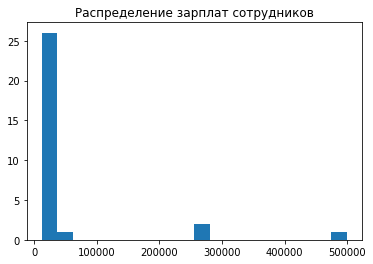

In [ ]:
import matplotlib.pyplot as plt
plt.hist(salaries, bins=20)
plt.title("Распределение зарплат сотрудников")
plt.show()

Для такого распределения *среднее арифметическое* — плохая характеристика. На неё слишком сильно влияют выбросы —  зарплаты директора, двух его заместителей и секретаря.

Статистика предлагает нам альтернативные характеристики распределения — [квантили](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C).

**медиана** — самый важный квантиль. Это число, которое находится **в середине этого набора, если его упорядочить по возрастанию**, то есть такое число, что половина из элементов набора не меньше него, а другая половина не больше.

**Первый квартиль** — это 0,25-квантиль. Это число, меньше которого находится 1/4 чисел набора, а больше него 3/4 набора.

**Третий квартиль** — это 0,75-квантиль. Это число, меньше которого находится 3/4 чисел набора, а больше него 1/4 набора.

*Второй квартиль* не говорят, т.к. это получается то же самое, что медиана.

Предположим, бухгалтер опубликовал эти квартили:

In [ ]:
print('Первый квартиль:', np.quantile(salaries, 0.25))
print('Медианная зарплата:', np.median(salaries))
print('Третий квартиль:', np.quantile(salaries, 0.75))

Первый квартиль: 13077.5
Медианная зарплата: 13975.0
Третий квартиль: 15012.5


Средняя зарплата слишком сильно отличается от медианной.

# Генерация случайных чисел
Компьютер работает по детерминированным алгоритмам, поэтому кажется, что в нём нет места случайностям. Тем не менее для некоторых алгоритмов критически необходима **генерация случайных чисел**, которые распределены специфическим образом в заданном диапазоне.

В **теории вероятности** для дискретных случайных величин вводится мера **вероятности случайной величины**, а для непрерывных случайных величин используется мера **плотности вероятности**.

*Выборка* представляет из себя конечный набор значений случайной величины.
Давайте посмотрим на распределение случайных чисел, которые даёт библиотека NumPy:

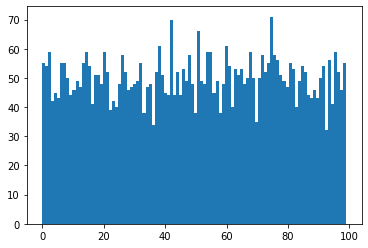

In [ ]:
import matplotlib.pyplot as plt
A = np.random.randint(0, 100, 5000)
plt.hist(A, bins=100)
plt.show()

Данное распределение называется *равномерным*. То есть все числа из данного диапазона *равновероятны*. Разница в частоте их появления является нормальным статистическим отклонением.

# Изображения как массивы NumPy
Одномерные массивы — это замечательно, но данные часто представляют из себя двумерный, трёхмерный или даже многомерный массив чисел.

Яркий пример — [растровое изображение](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0). В нём пиксели имеют две координаты — индекс строки и индекс столбца, при этом каждый пиксел в классической модели RGB содержит три компоненты цвета: красную (red), зелёную (green) и синюю (blue). Получается, что изображение — это трёхмерный массив.

Давайте откроем изображение главного здания МГУ при помощи Matplotlib и выполним с ним некоторые операции.

In [ ]:
!wget -O "msu_original.jpg" "https://drive.google.com/uc?id=1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0"

--2021-11-24 07:22:32--  https://drive.google.com/uc?id=1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0
Resolving drive.google.com (drive.google.com)... 173.194.195.139, 173.194.195.101, 173.194.195.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.195.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v941ed4pknb9hcropb7p9slqst2cc32t/1637738550000/05476118052512889131/*/1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0 [following]
--2021-11-24 07:22:33--  https://doc-0g-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v941ed4pknb9hcropb7p9slqst2cc32t/1637738550000/05476118052512889131/*/1Sg0ozKPncRlYTT2yT8J5aOs_-fgk1Sy0
Resolving doc-0g-1g-docs.googleusercontent.com (doc-0g-1g-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to doc-0g-1g-docs.googleusercontent.com (doc-0g-1g-docs.googleusercontent.com)|1

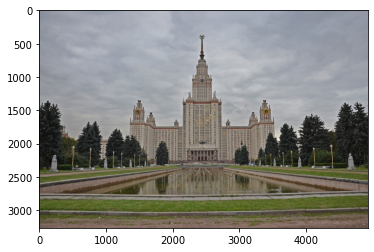

In [ ]:
import matplotlib.pyplot as plt
msu_image = plt.imread("msu_original.jpg")
plt.imshow(msu_image)

Обратите внимание на тип картинки:

In [ ]:
type(msu_image)

numpy.ndarray

Это значит, что это массив NumPy!

К нему применимы массовые векторные операции, которые отразятся сразу на всех пикселах и всех компонентах цвета:

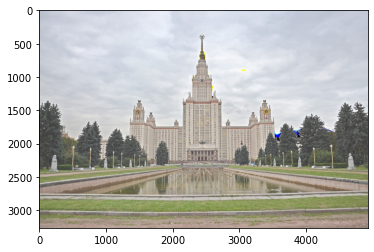

In [ ]:
plt.imshow(msu_image + 50)

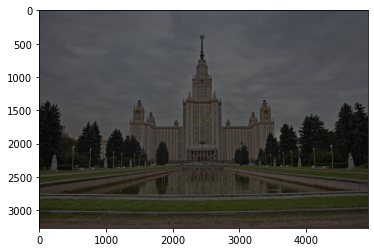

In [ ]:
plt.imshow(msu_image // 2)

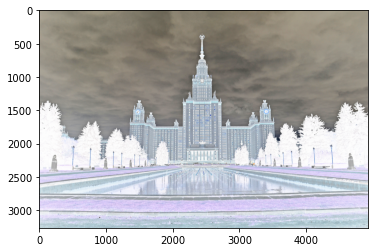

In [ ]:
plt.imshow(np.cos(np.pi / 2 * msu_image / 255))

Чтобы узнать размеры массива NumPy, используется атрибут `shape`. Обратите внимание, что это не функция-метод, а *кортеж*, поэтому скобки возле `shape` не пишут:

In [ ]:
msu_image.shape

(3264, 4928, 3)

Для многомерных массивов NumPy есть функция **транспонирования** `np.transpose`. Она возвращает новый массив с теми же числами, но оси координат массива меняют порядок. Второй параметр функции — кортеж с порядком перестановки осей координат.

Оригинальный порядок для трёхмерного массива — (0, 1, 2), а мы сделаем порядок (1, 0, 2), чтобы не трогать цветовую ось.
Наша картинка в этом случае "поворачивается" (на самом деле ещё и отзеркаливается).

(4928, 3264, 3)


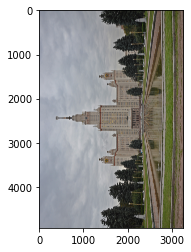

In [ ]:
msu_transposed = np.transpose(msu_image, (1, 0, 2))
print(msu_transposed.shape)
plt.imshow(msu_transposed)

А вот как вы сможете объяснить эти изменения?

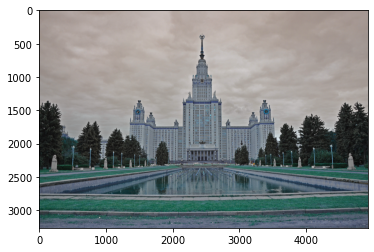

In [ ]:
plt.imshow(msu_image[:, :, ::-1])

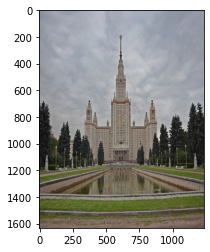

In [ ]:
plt.imshow(msu_image[::2, ::4])

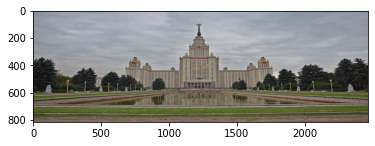

In [ ]:
plt.imshow(msu_image[::4, ::2])

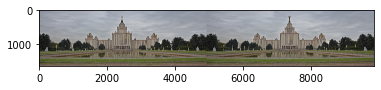

In [ ]:
plt.imshow(msu_image.reshape((3264 // 2, 4928*2, 3)))

# Многомерные массивы NumPy

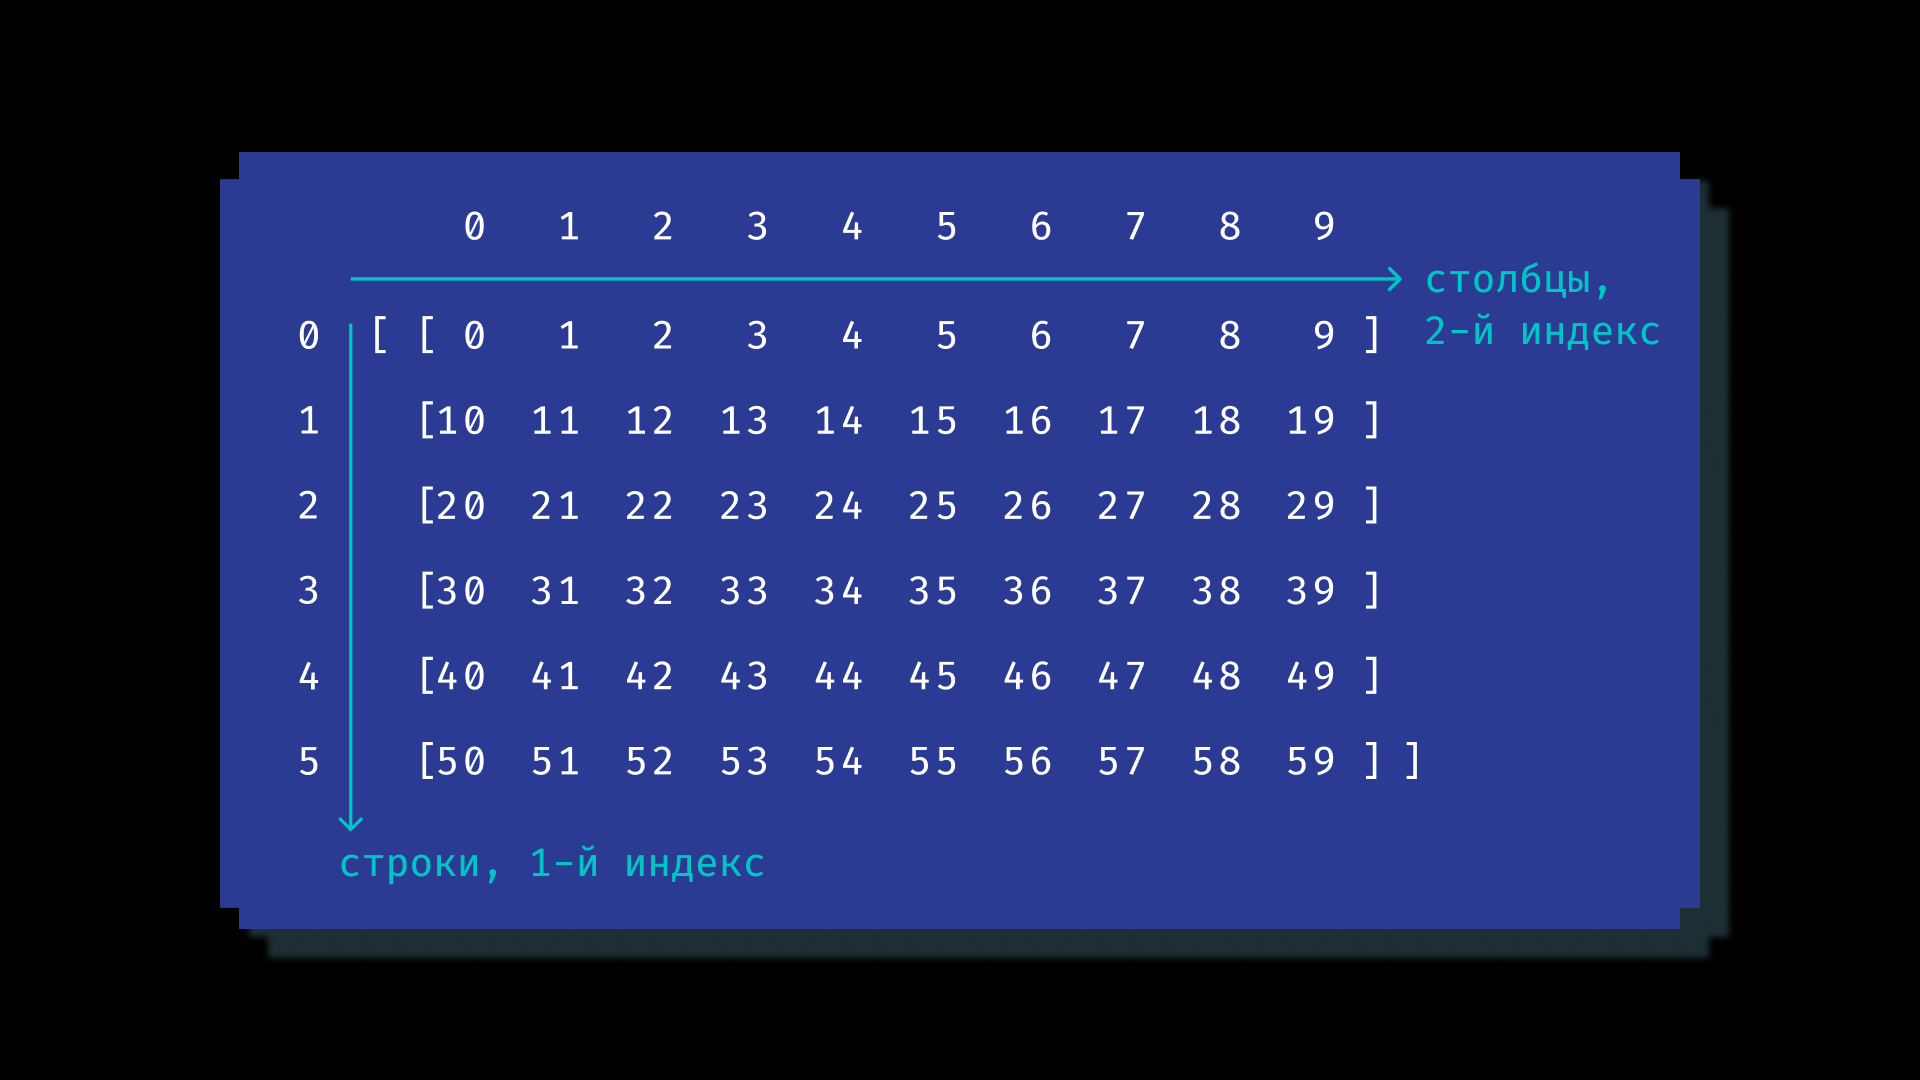

## Создание многомерных массивов

Создать многомерный массив можно несколькими способами. Первый — `reshape` одномерного массива:

In [ ]:
A = np.arange(0, 60).reshape(6, 10)  # Первый индекс - высота, второй - ширина!
print(A)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]]


In [ ]:
np.zeros_like(A)  # Создать массив по форме как данный, но состящий из нулей.

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Срезы
В классических срезах строк или списков у нас два параметра `[start:stop]`, где start входит в вырезаемый диапазон, а stop не входит.

Срезы многомерных массивов работают так же, только осуществляются *сразу по нескольким координатам*.
При этом срезаемые диапазоны по каждой из координат отделяются друг от друга запятой.
Как и во всех срезах, *левая граница среза входит в диапазон, а правая — нет*.

In [ ]:
A[2:5, 2:7]

array([[22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]])

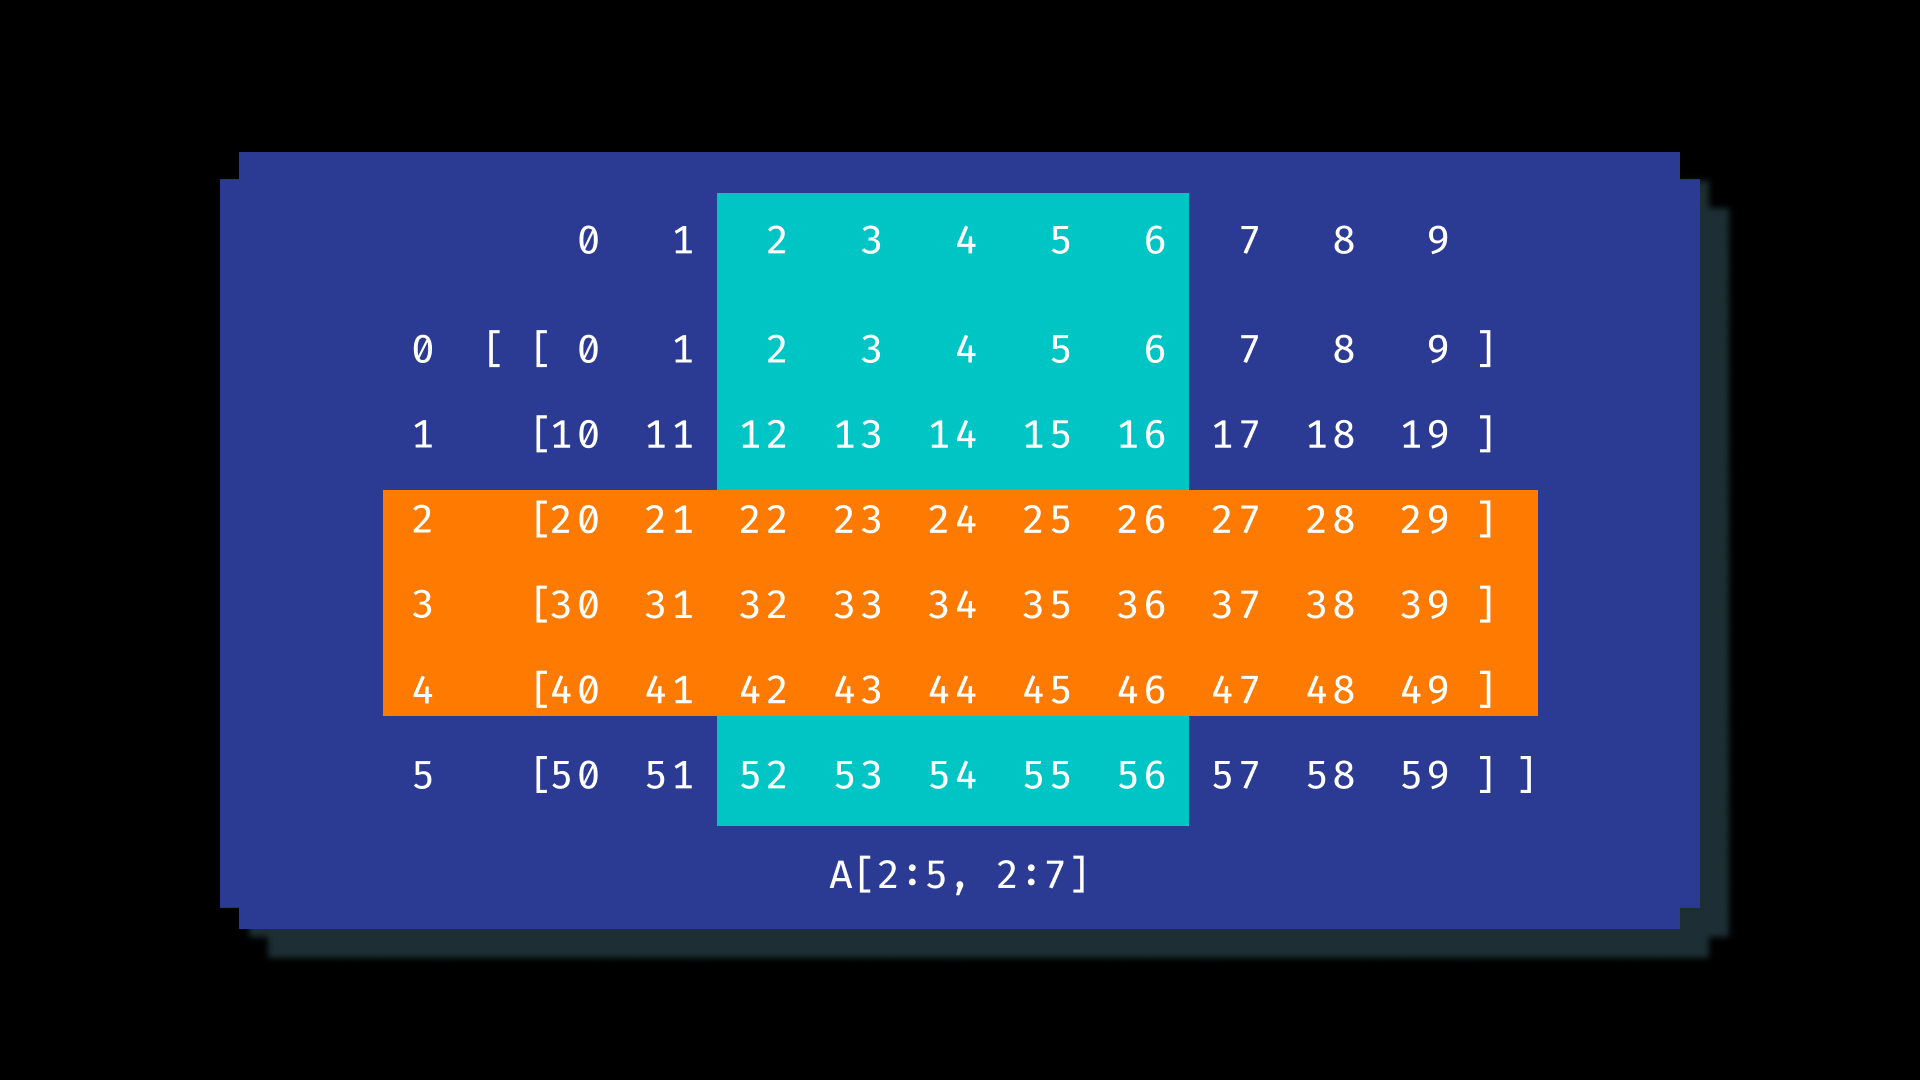

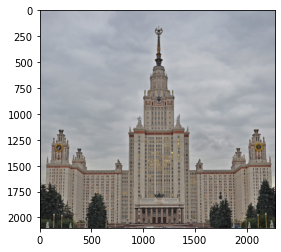

In [ ]:
plt.imshow(msu_image[200:2300, 1300:3570])

Если указать в срезе только один диапазон, то массив будет срезаться по 1-й координате (выбор строк).

In [ ]:
A[3:5]

array([[30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

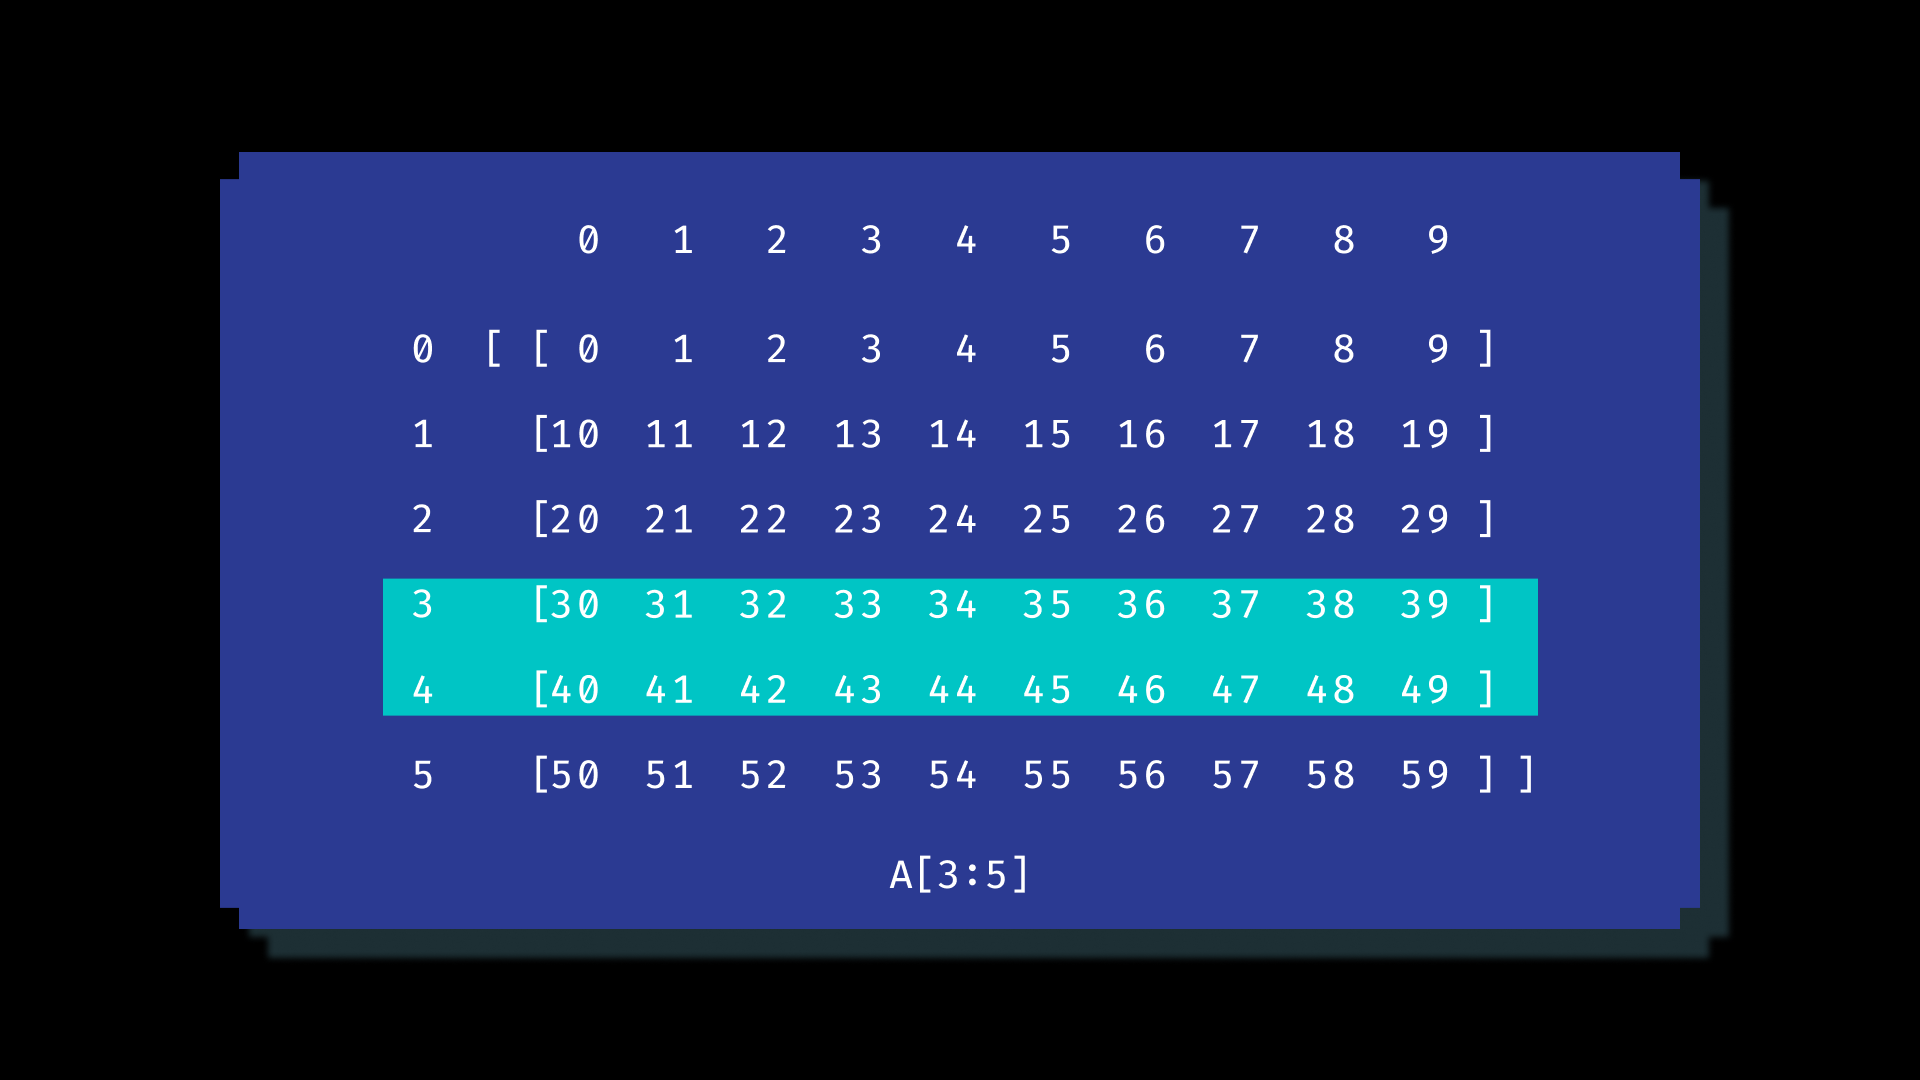

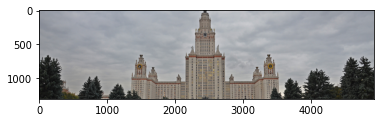

In [ ]:
plt.imshow(msu_image[700:2000])

Если нужно срезать по 2-й координате (выбор столбцов), то нужно поставить перед запятой `:`, что значит "от края до края":

In [ ]:
A[:,3:5]

array([[ 3,  4],
       [13, 14],
       [23, 24],
       [33, 34],
       [43, 44],
       [53, 54]])

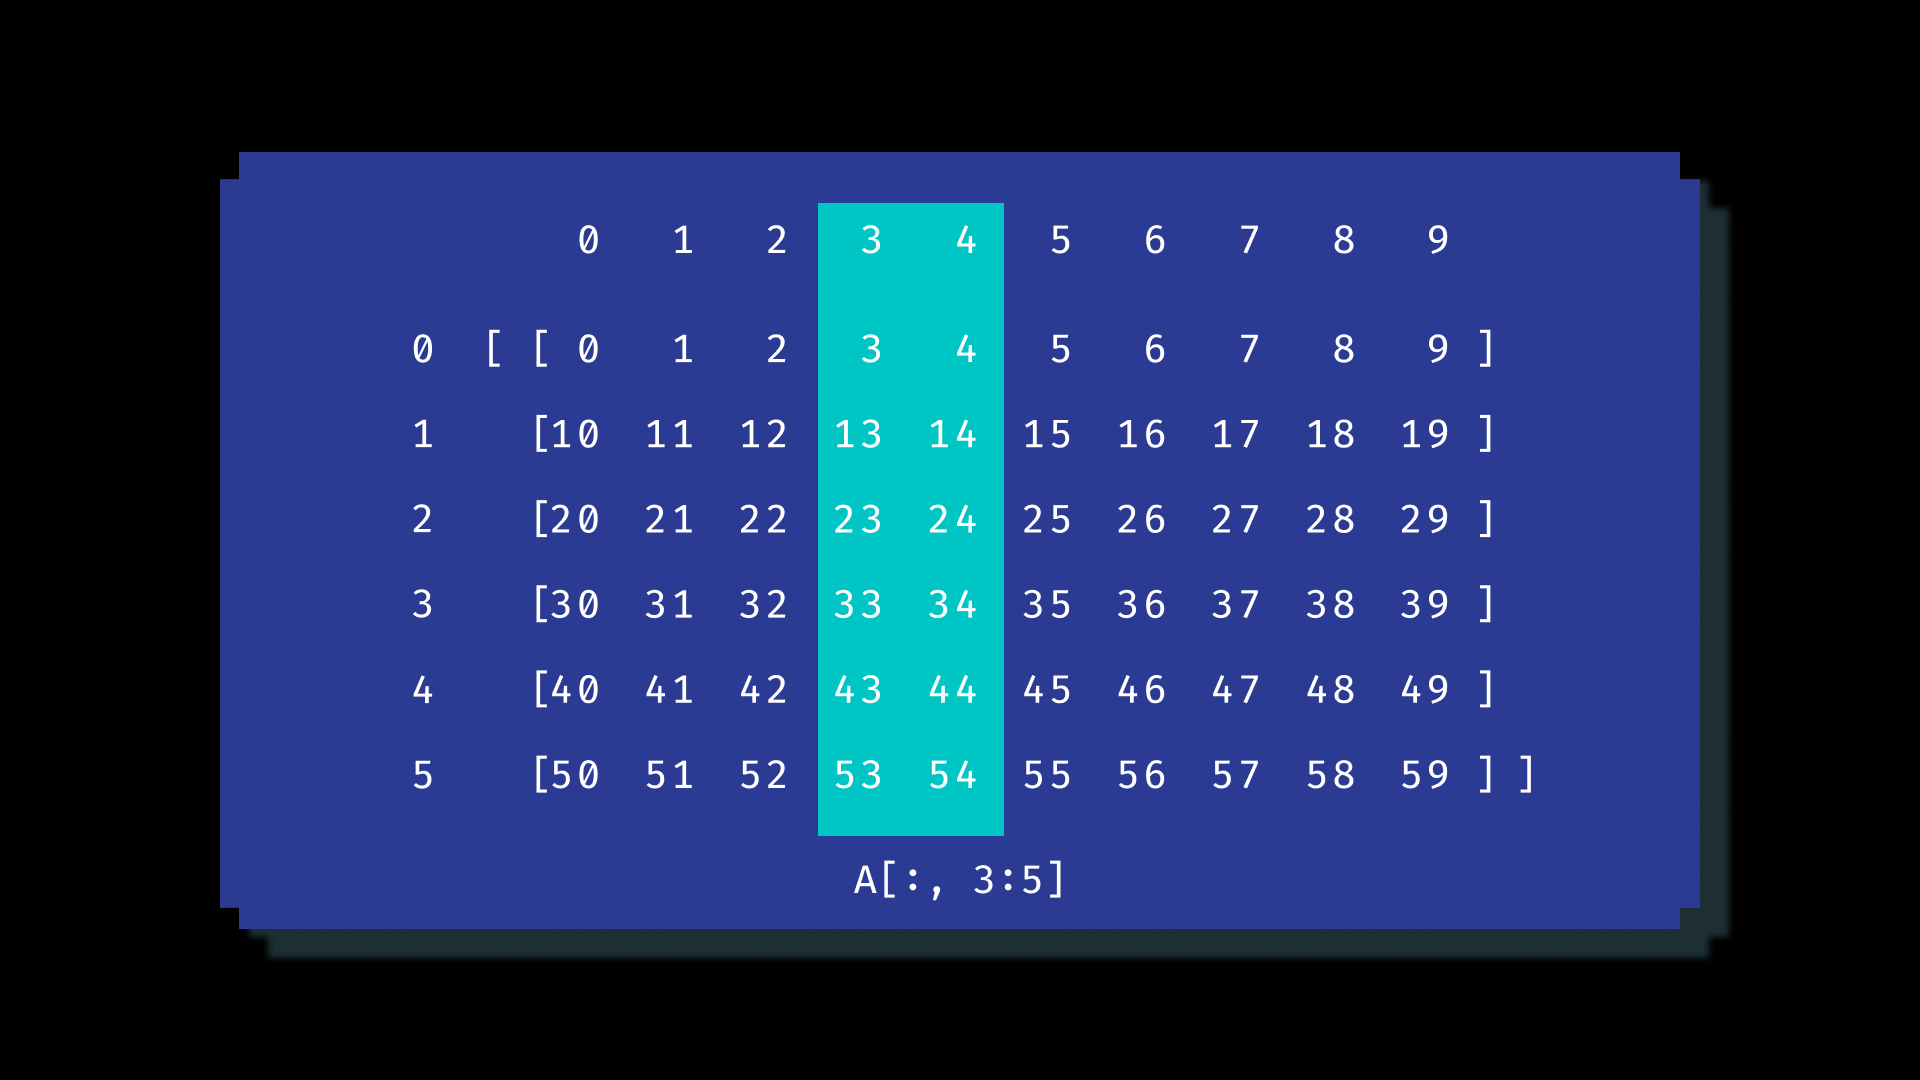

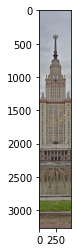

In [ ]:
plt.imshow(msu_image[:, 2200:2670])

Если один из краёв диапазона не указан, то за край будет принят соответствующий край массива.

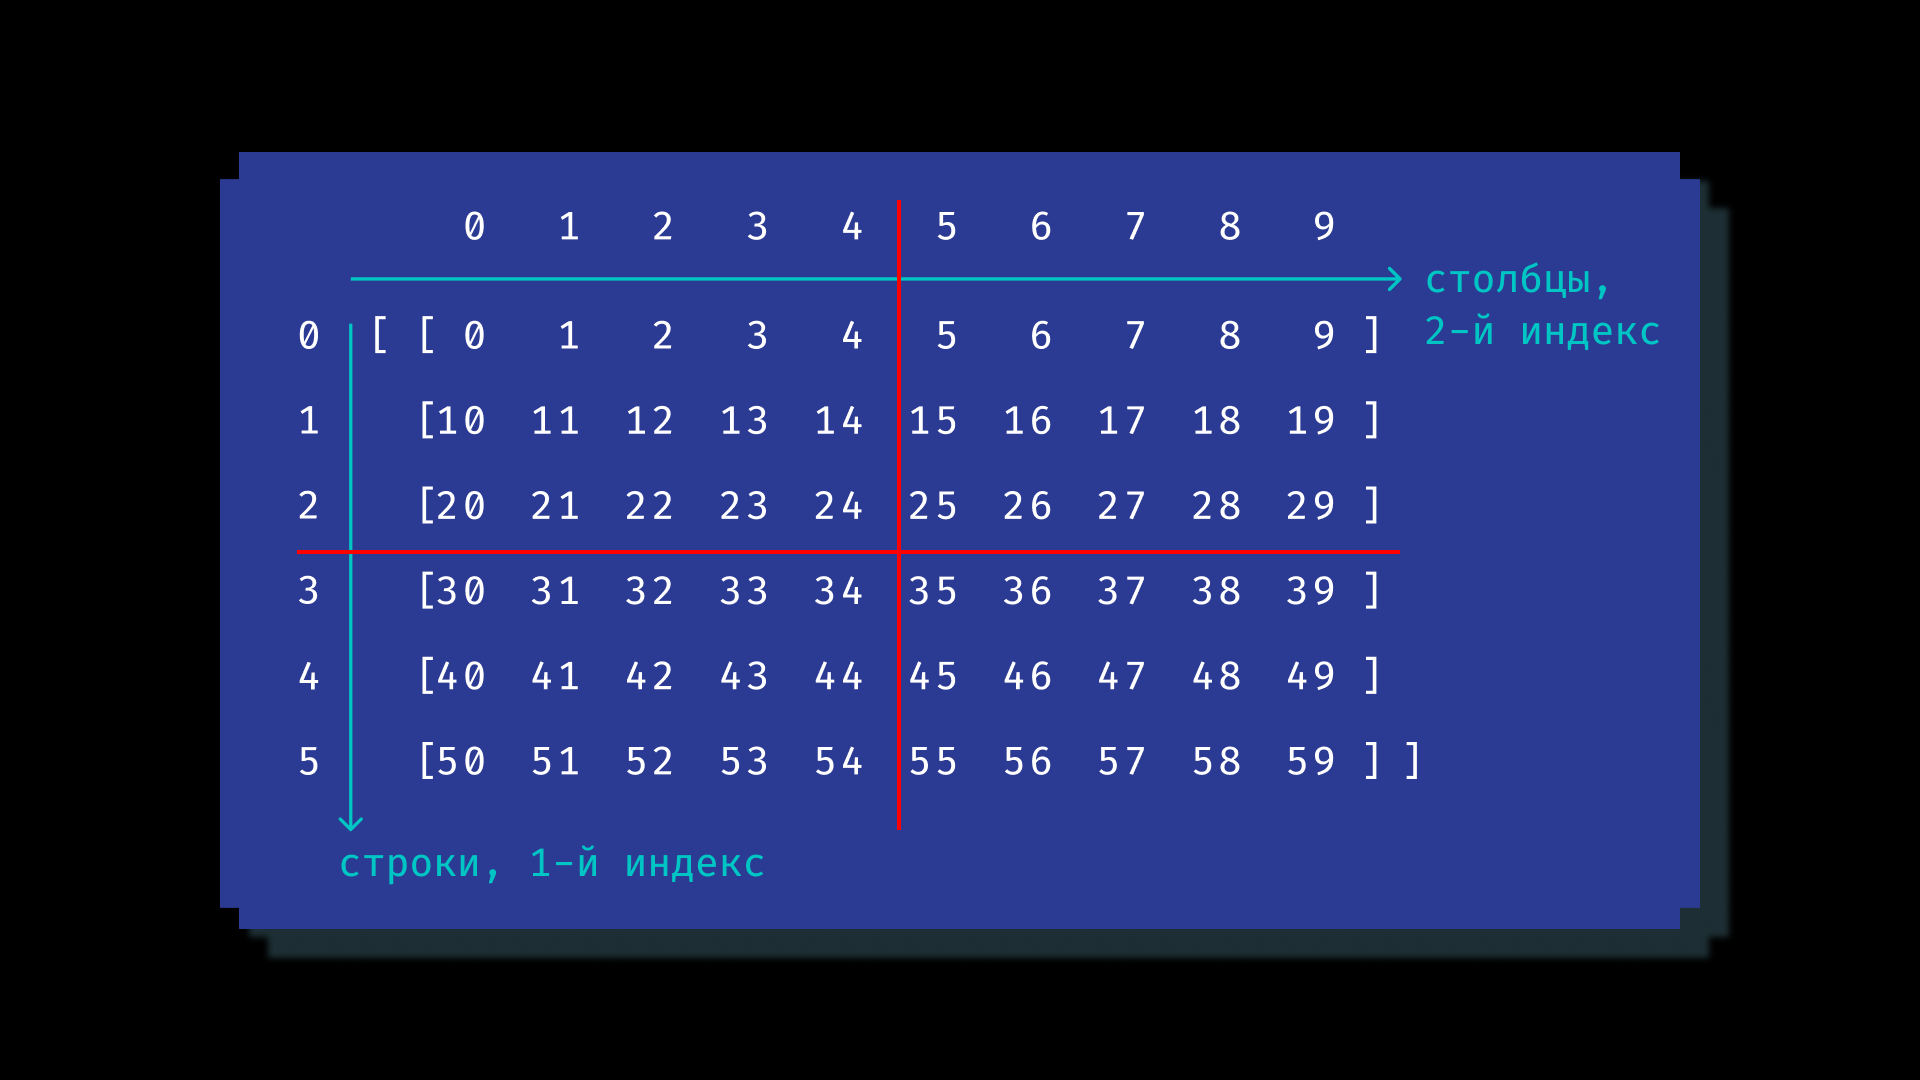

Примем `(5, 3)` за точку разделения матрицы на срезы, и разрежем её на 4 прямоугольные части:

In [ ]:
row, col = 3, 5
A[:row, :col]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
row, col = 3, 5
A[row:, :col]

array([[30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44],
       [50, 51, 52, 53, 54]])

In [ ]:
row, col = 3, 5
A[:row, col:]

array([[ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19],
       [25, 26, 27, 28, 29]])

In [ ]:
row, col = 3, 5
A[row:, col:]

array([[35, 36, 37, 38, 39],
       [45, 46, 47, 48, 49],
       [55, 56, 57, 58, 59]])

Такие же срезы картинки с МГУ:

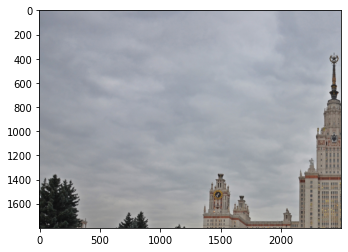

In [ ]:
plt.imshow(msu_image[:1800, :2500])

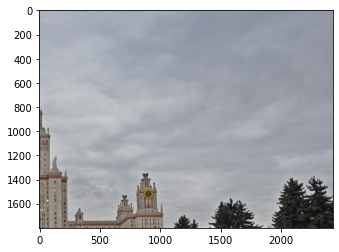

In [ ]:
plt.imshow(msu_image[:1800, 2500:])

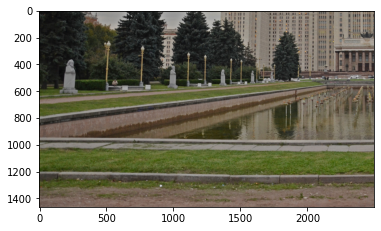

In [ ]:
plt.imshow(msu_image[1800:, :2500])

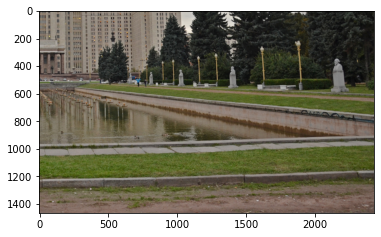

In [ ]:
plt.imshow(msu_image[1800:, 2500])

### Срез с тремя параметрами
Как вы помните, в классических срезах строк и списков могло быть и три параметра `[start:stop:step]`. В этом случае срез начинается с положения start до stop не включительно с шагом step. При этом шаг мог быть даже отрицательным!
Это позволит нам отразить картинку по любой из осей, например, по-вертикали:

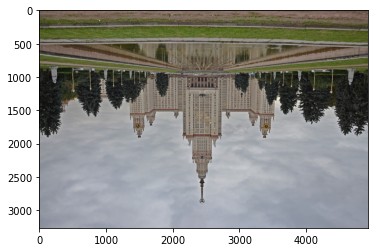

In [ ]:
plt.imshow(msu_image[::-1, :])

Мы можем взять только каждый десятый пиксел, что автоматически приведёт к уменьшению картинки в 10 раз:

Размеры картинки: (327, 493, 3)


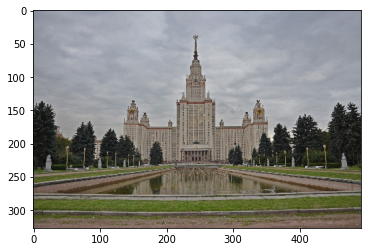

In [ ]:
msu_small = msu_image[::10, ::10]
print("Размеры картинки:", msu_small.shape)
plt.imshow(msu_small)

### Присваивания в срез
Присваивание в срез предназначено *для изменения исходного массива*, а не для создания нового.
В одномерные срезы массивов NumPy можно присваивать любые итерируемые объекты, даже генерирующие последовательнось на лету.

In [ ]:
A = np.arange(60).reshape(6, 10)
A[:, 4] = range(111, 700, 111)
A

array([[  0,   1,   2,   3, 111,   5,   6,   7,   8,   9],
       [ 10,  11,  12,  13, 222,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23, 333,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33, 444,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43, 555,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53, 666,  55,  56,  57,  58,  59]])

Однако, если срез двумерный, то присваивать туда нужно только массив NumPy, причём совпадающего размера:

In [ ]:
A = np.arange(60).reshape(6, 10)
A[1::2, :] = np.zeros((3, 10))
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

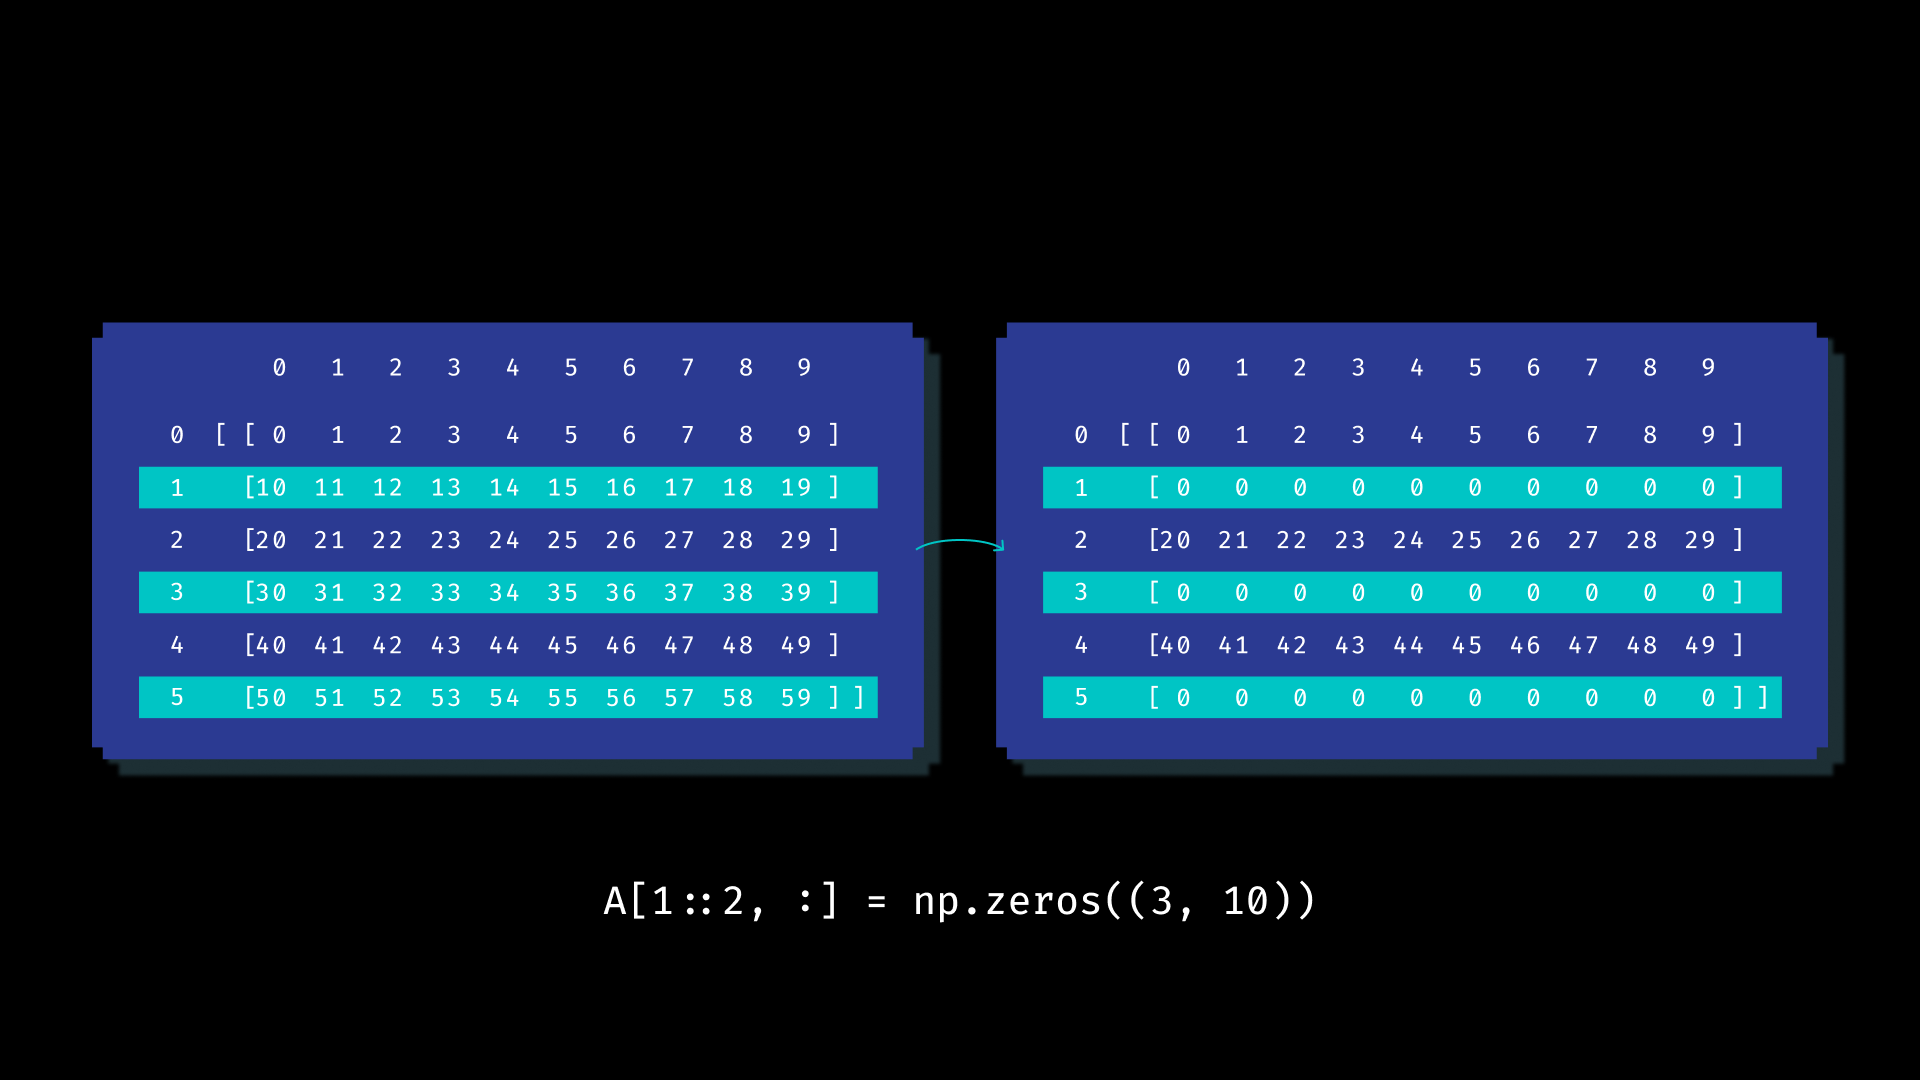

Удивительной и удобной возможностью является присваивание целому срезу *одного конкретного значения*.

Например, если нам нужно занулить кусок массива, мы можем не создавать аналогичный срезу по размеру `zeros`:

In [ ]:
A = np.arange(60).reshape(6, 10)
A[1:5, 3:8] = 0  # Да! Получается массовое присваивание одного значения!
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12,  0,  0,  0,  0,  0, 18, 19],
       [20, 21, 22,  0,  0,  0,  0,  0, 28, 29],
       [30, 31, 32,  0,  0,  0,  0,  0, 38, 39],
       [40, 41, 42,  0,  0,  0,  0,  0, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]])

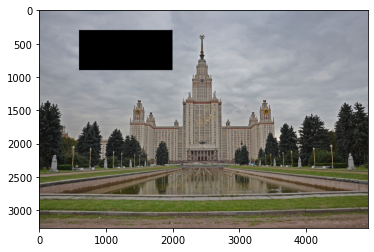

In [ ]:
msu_copy = msu_image.copy()
msu_copy[300:900, 600:2000] = 0
plt.imshow(msu_copy)

Поработаем с цветовыми слоями изображения:

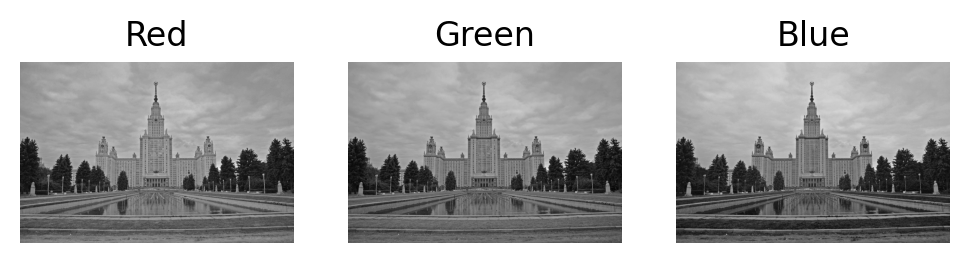

In [ ]:
msu_small = msu_image[::4, ::4]
msu_red = msu_small[:, :, 0]
msu_green = msu_small[:, :, 1]
msu_blue = msu_small[:, :, 2]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=200)

for ax, color_channel, color_title in [(ax1, msu_red, 'Red'),
                                       (ax2, msu_green, 'Green'),
                                       (ax3, msu_blue, 'Blue')]:
    ax.set_title(color_title)
    ax.imshow(color_channel, cmap='gray')
    ax.axis('off')
plt.show()

Интересно было бы посмотреть на гистограммы яркости каналов. Количество бинов, очевидно, должно быть 256, т.к. на каждый канал обычно отводится по 1 байту, и значения яркости пиксела в канале идут от 0 до 255.

Построим гистограмму функцией `plt.hist`, которой передадим линеаризованный вид массива пикселей канала, полученный методом `ndarray.ravel()`:

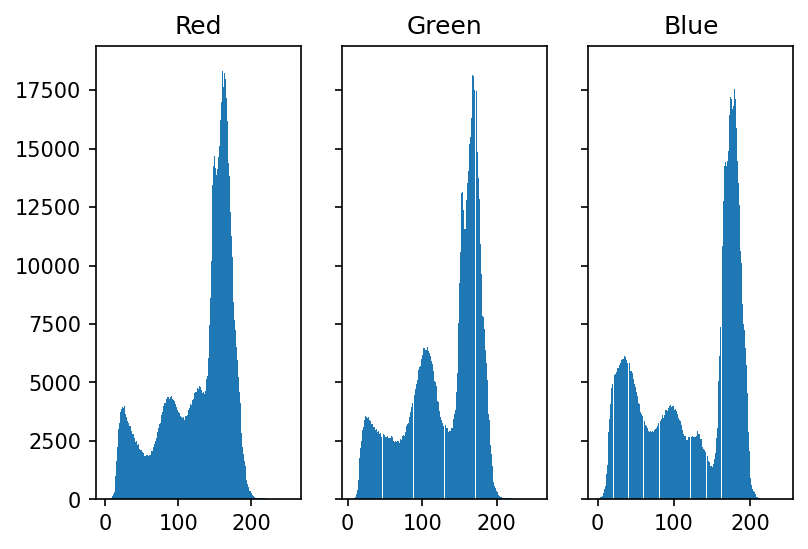

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=150, sharey='row')

for ax, color_channel, color_title in [(ax1, msu_red, 'Red'),
                                       (ax2, msu_green, 'Green'),
                                       (ax3, msu_blue, 'Blue')]:
    ax.set_title(color_title)
    ax.hist(color_channel.ravel(), bins=256)

plt.show()

Изучение гистограмм яркости каналов фотографии позволяет осуществлять профессиональную обработку изображения.

А мы ограничимся тем, что заметим сложную структуру этих гистограмм. Она косвенно говорит нам о том, что яркости пикселов не являются случайными величинами.

# Скорость работы программы
Настало время поговорить о скорости работы программного кода и способах ускорить работу с массивами.
Когда данных становится много, обработка массивов с ними начинает происходить достаточно долго, чтобы этим озаботиться.

Вот два варианта кода, которые делают почти одно и то же: создают список/массив заданной длины, а потом разворачивают его задом-наперёд.

In [ ]:
a = list(range(10000))
a[::-1] = a

In [ ]:
import numpy as np
a = np.array(range(10000))
a[::-1] = a

Очевидно, они работают с разной скоростью, но *как измерить скорость работы куска кода*?

Для этого можно воспользоваться отметками времени от начала вычислительного процесса, которые возвращает функция `perf_counter` из стандартной библиотеки `time`:

In [ ]:
import time

a = list(range(100000))
moment1 = time.perf_counter()
# код, скорость работы которого мы измеряем
a[::-1] = a
moment2 = time.perf_counter()
print(moment2 - moment1, "секунд потребовалось на выполнение.")

0.0026347999992140103 секунд потребовалось на выполнение.


In [ ]:
import time
import numpy as np

a = np.array(range(100000))
moment1 = time.perf_counter()
# код, скорость работы которого мы измеряем
a[::-1] = a
moment2 = time.perf_counter()
print(moment2 - moment1, "секунд потребовалось на выполнение.")

0.0005552000002353452 секунд потребовалось на выполнение.


Таким методом вы можете вручную выяснять скорость выполнения вашего кода. Однако, от запуска к запуску время работы кода будет отличаться. По-хорошему, код нужно выполнить некоторое количество раз, чтобы собрать статистику и вычислить среднее время выполнения.

Библиотека `timeit` содержит функцию `timeit`, которая запускает данный ей кусочек кода столько раз, сколько вы попросите, и возвращает общее время выполнения кода в секундах:

In [ ]:
from timeit import timeit

In [ ]:
timeit("a[::-1] = a", "a = list(range(100000))", number=1000)

1.9140651999987313

In [ ]:
timeit("a[::-1] = a", "import numpy as np; a = np.array(range(100000))", number=1000)

0.13077939999857335